# GEO877: Spatial Algorithms

## Practical 4: Point in Polygon

I've prepared some code for you. It uses the same polygons we already worked with, and creates random points around them to test for containment. Look to see how I do that.

I've added a Bounding Box class, and a containsPoint method to it and the Polygon class. At the moment we **only** test whether a Point is in the Bounding Box. You need to now use the ray intersection approach to complete the implementation of the Point in Polygon class. First do so without worrying about special cases, and test for some simpler geometries, then on the data here, and finally add code to handle the special cases (c.f. my pseodo-code).


In [1]:
# SETUP
# =====
from geospatial import *
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


# TEST DATA
# =========
# a small group of points, spatially ordered
sample1 = [[0,10], [5,0], [10,10], [15,0], [20,10], [25, 0],
             [30, 20], [35, 15], [45, 0], [50, 50], [45, 40], 
             [40, 50], [30, 45], [25, 40], [20, 30], [15, 50],
             [10,35], [5, 50],[5,50], [0, 10]]

print(sample1)

[[0, 10], [5, 0], [10, 10], [15, 0], [20, 10], [25, 0], [30, 20], [35, 15], [45, 0], [50, 50], [45, 40], [40, 50], [30, 45], [25, 40], [20, 30], [15, 50], [10, 35], [5, 50], [5, 50], [0, 10]]


Polygon PointGroup containing 20 points
Polygon is closed: True


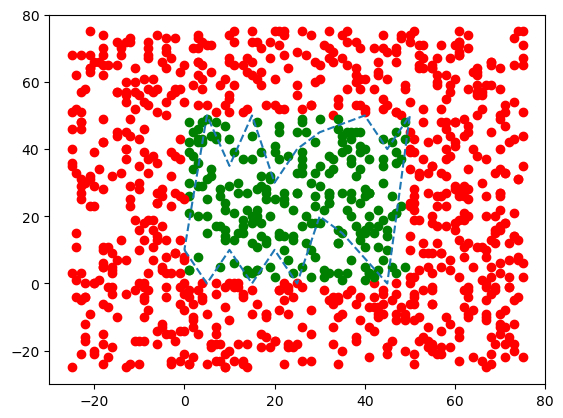

In [2]:
# DEMO WITH SMALL DATASET
# ====
# create polygon from sample1 - Polygon expects a list of points, each with x,y coords
samplePolygon = Polygon(sample1, xcol=0, ycol=1)
print(samplePolygon)

# we can test if it is a closed polygon (first and last points have the same coordinates)
print(f"Polygon is closed: {samplePolygon.isClosed()}")

xs = [i.x for i in samplePolygon]
ys = [i.y for i in samplePolygon]




points = []
contained = []
for i in range(1000): # Create 100 random Points to test
    x = random.randint(-25,75)
    y = random.randint(-25,75)
    p = Point(x,y)
    test = samplePolygon.containsPoint(p)
    points.append(p)
    contained.append(test)

# This is a nasty special case - draw it to see why    
p = Point(21,15)
test = samplePolygon.containsPoint(p)
points.append(p)
contained.append(test)    

for p, test in zip(points, contained): # zip lets us iterate through both lists at the same time
    if (test == True):
        c = 'green'
    else:
        c = 'red'
    plt.scatter(p.x, p.y, color=c)

plt.plot(xs, ys, linestyle='dashed')

Polygon is closed: True


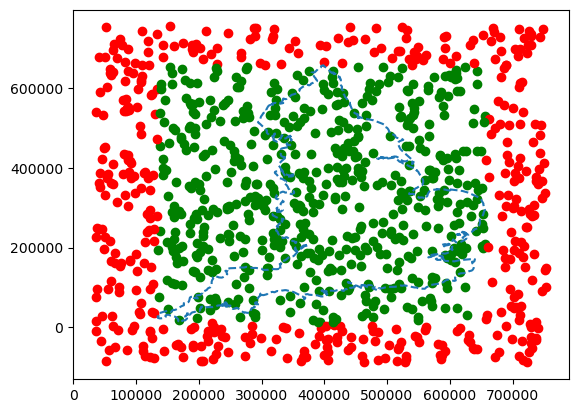

In [3]:
# DEMO WITH BIG DATASET
# ====

# read in the data from a file
data_folder = ""   # specify folder where dataset is
data_file = "polygon_testData.csv"
input_string = data_folder + data_file
col_names = ['x', 'y']
df = pd.read_csv(input_string, sep = ",", header=None, names=col_names)
df = df[['x', 'y']].to_numpy()  # convert to numpy array to instantiate using Polygon class

#create a polygon
poly = Polygon(df, xcol=0, ycol=1)

# we can test if it is a closed polygon (first and last points have the same coordinates)
print(f"Polygon is closed: {poly.isClosed()}")



# Some variables to create random test points and store results
bbox = Bbox(poly)
points = []
contained = []

for i in range(1000): # Create 1000 random Points to test
    x = random.randint(int(bbox.ll.x)-100000,int(bbox.ur.x)+100000)
    y = random.randint(int(bbox.ll.y)-100000,int(bbox.ur.y)+100000)
    p = Point(x,y)
    test = poly.containsPoint(p)
    points.append(p)
    contained.append(test)


for p, test in zip(points, contained):
    if (test == True):
        c = 'green'
    else:
        c = 'red'
    plt.scatter(p.x, p.y, color=c)

#plot the polygon to the screen
xs = [i.x for i in poly]
ys = [i.y for i in poly]
plt.plot(xs, ys, linestyle='dashed')